# Module 10 Application

## Challenge: Crypto Clustering

In this Challenge, you’ll combine your financial Python programming skills with the new unsupervised learning skills that you acquired in this module.

The CSV file provided for this challenge contains price change data of cryptocurrencies in different periods.

The steps for this challenge are broken out into the following sections:

* Import the Data (provided in the starter code)
* Prepare the Data (provided in the starter code)
* Find the Best Value for `k` Using the Original Data
* Cluster Cryptocurrencies with K-means Using the Original Data
* Optimize Clusters with Principal Component Analysis
* Find the Best Value for `k` Using the PCA Data
* Cluster the Cryptocurrencies with K-means Using the PCA Data
* Visualize and Compare the Results

### Import the Data

This section imports the data into a new DataFrame. It follows these steps:

1. Read  the “crypto_market_data.csv” file from the Resources folder into a DataFrame, and use `index_col="coin_id"` to set the cryptocurrency name as the index. Review the DataFrame.

2. Generate the summary statistics, and use HvPlot to visualize your data to observe what your DataFrame contains.


> **Rewind:** The [Pandas`describe()`function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) generates summary statistics for a DataFrame. 

In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    Path("Resources/crypto_market_data.csv"),
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

This section prepares the data before running the K-Means algorithm. It follows these steps:

1. Use the `StandardScaler` module from scikit-learn to normalize the CSV file data. This will require you to utilize the `fit_transform` function.

2. Create a DataFrame that contains the scaled data. Be sure to set the `coin_id` index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.


In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data

In this section, you will use the elbow method to find the best value for `k`.

1. Code the elbow method algorithm to find the best value for `k`. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of `k` to visually identify the optimal value for `k`.

3. Answer the following question: What is the best value for `k`?

In [7]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k=list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [8]:
# Create an empy list to store the inertia values
inertia=[]

In [9]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)
inertia

c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defaul

[287.0,
 195.82021818036043,
 123.19048183836959,
 79.02243535120975,
 63.85866780584265,
 52.8298185338292,
 44.4067905846164,
 36.93372204207989,
 32.83250737284909,
 28.483036890655296,
 25.0219440758736]

In [10]:
# Create a dictionary with the data to plot the Elbow curve
inertia_dict = {'k':k,'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
inertia_pd=pd.DataFrame(inertia_dict)
inertia_pd=inertia_pd.set_index('k')

<Axes: xlabel='k'>

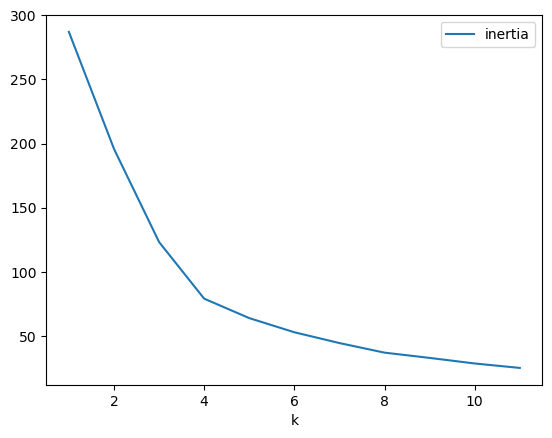

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
inertia_pd.plot()

#### Answer the following question: What is the best value for k?
**Question:** What is the best value for `k`?

**Answer:** The best value of k is at least 4, probably 5.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In this section, you will use the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the price changes of cryptocurrencies provided.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the original data.

3. Predict the clusters to group the cryptocurrencies using the original data. View the resulting array of cluster values.

4. Create a copy of the original data and add a new column with the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [12]:
# Initialize the K-Means model using the best value for k
model=KMeans(n_clusters=5)

In [13]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)
df_market_data_scaled.shape

c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(41, 7)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters=model.predict(df_market_data_scaled)

# View the resulting array of cluster values.
clusters

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 4, 0, 0, 0, 3, 4, 0, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0])

In [15]:
# Create a copy of the DataFrame
df_market_data_scaled_clusters=df_market_data_scaled.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_clusters['clusters']=clusters

# Display sample data
df_market_data_scaled_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_scaled_clusters.hvplot.scatter(x='price_change_percentage_24h',y='price_change_percentage_7d',by='clusters')

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis

In this section, you will perform a principal component analysis (PCA) and reduce the features to three principal components.

1. Create a PCA model instance and set `n_components=3`.

2. Use the PCA model to reduce to three principal components. View the first five rows of the DataFrame. 

3. Retrieve the explained variance to determine how much information can be attributed to each principal component.

4. Answer the following question: What is the total explained variance of the three principal components?

5. Create a new DataFrame with the PCA data. Be sure to set the `coin_id` index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame.

In [18]:
# Create a PCA model instance and set `n_components=3`.
model=PCA(n_components=3)

In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca=model.fit_transform(df_market_data_scaled)
pca_data_df = pd.DataFrame(
    pca,
    columns=["PCA1", "PCA2","PCA3"]
)

# View the first five rows of the DataFrame. 
pca_data_df.head()

,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [21]:
print(sum(model.explained_variance_ratio_))

0.895031657030984


#### Answer the following question: What is the total explained variance of the three principal components?

**Question:** What is the total explained variance of the three principal components?

**Answer:** The sum of the variance ratios is 0.895. So, the total explained variance is 89.5%.

In [22]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
# YOUR CODE HERE!

# Copy the crypto names from the original data
pca_data_df.index=df_market_data_scaled.index

# Set the coinid column as index

# Display sample data
# YOUR CODE HERE!

---

### Find the Best Value for k Using the PCA Data

In this section, you will use the elbow method to find the best value for `k` using the PCA data.

1. Code the elbow method algorithm and use the PCA data to find the best value for `k`. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of `k` to visually identify the optimal value for `k`.

3. Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?

In [23]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k=list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [24]:
# Create an empy list to store the inertia values
inertia=[]

In [25]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(pca_data_df)
    inertia.append(model.inertia_)

c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a

In [26]:
# Create a dictionary with the data to plot the Elbow curve
inertia_dict = {'k':k,'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
inertia_pd=pd.DataFrame(inertia_dict)
inertia_pd=inertia_pd.set_index('k')

<Axes: xlabel='k'>

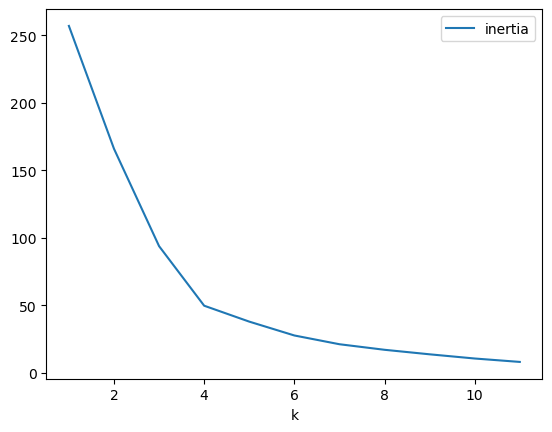

In [27]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
inertia_pd.plot()

#### Answer the following questions: What is the best value for k when using the PCA data? Does it differ from the best k value found using the original data?
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** # I would estimate k=4 is the best value.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Not really

---

### Cluster Cryptocurrencies with K-means Using the PCA Data

In this section, you will use the PCA data and the K-Means algorithm with the best value for `k` found in the previous section to cluster the cryptocurrencies according to the principal components.

1. Initialize the K-Means model with four clusters using the best value for `k`. 

2. Fit the K-Means model using the PCA data.

3. Predict the clusters to group the cryptocurrencies using the PCA data. View the resulting array of cluster values.

4. Add a new column to the DataFrame with the PCA data to store the predicted clusters.

5. Create a scatter plot using hvPlot by setting `x="PC1"` and `y="PC2"`. Color the graph points with the labels found using K-Means and add the crypto name in the `hover_cols` parameter to identify the cryptocurrency represented by each data point.

In [28]:
# Initialize the K-Means model using the best value for k
model=KMeans(n_clusters=4)

In [29]:
# Fit the K-Means model using the PCA data
model.fit(pca_data_df)

c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jason\mambaforge\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [30]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters=model.predict(pca_data_df)

# View the resulting array of cluster values.
pca_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [31]:
# Create a copy of the DataFrame with the PCA data
pca_data_df_clusters=pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_df_clusters['clusters']=pca_clusters

# Display sample data
pca_data_df_clusters.head()

,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [32]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_data_df_clusters.hvplot.scatter(x='PCA1',y='PCA2',by='clusters',hover_cols='coin_id')

:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

---

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

1. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the Elbow Curve that you created to find the best value for `k` with the original and the PCA data.

2. Create a composite plot using hvPlot and the plus (`+`) operator to contrast the cryptocurrencies clusters using the original and the PCA data.

3. Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

> **Rewind:** Back in Lesson 3 of Module 6, you learned how to create composite plots. You can look at that lesson to review how to make these plots; also, you can check [the hvPlot documentation](https://holoviz.org/tutorial/Composing_Plots.html).

In [33]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

In [34]:
# Compoosite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** # YOUR ANSWER HERE!